In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv', index_col=0)


In [3]:
df.shape

(53940, 10)

In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.describe(include=[object])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [7]:
# add volume
df['volume'] = df['x'] * df['y'] * df['z']

# there are diamonds with zero volume.
df.query('volume == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,0.0


In [8]:
# here df has only no zero volume
df = df[df['volume'] > 0]

# drop length, width and depth
df = df.drop(columns=['x', 'y', 'z'])

In [9]:
# a slice of the original dataset from 10 to 20 rows 0 to 3 column inclusive
df.iloc[10:20, :3]

,carat,cut,color
11,0.30,Good,J
12,0.23,Ideal,J
13,0.22,Premium,F
14,0.31,Ideal,J
15,0.20,Premium,E
16,0.32,Premium,E
17,0.30,Ideal,I
18,0.30,Good,J
19,0.30,Good,J
20,0.30,Very Good,J


In [10]:
# good very good:).
df.query('cut == "Good" or cut == "Very Good"')

,carat,cut,color,clarity,depth,table,price,volume
3,0.23,Good,E,VS1,56.9,65.0,327,38.076885
5,0.31,Good,J,SI2,63.3,58.0,335,51.917250
6,0.24,Very Good,J,VVS2,62.8,57.0,336,38.693952
7,0.24,Very Good,I,VVS1,62.3,57.0,336,38.830870
8,0.26,Very Good,H,SI1,61.9,55.0,337,42.321081
...,...,...,...,...,...,...,...,...
53928,0.79,Good,F,SI1,58.1,59.0,2756,131.503212
53933,0.70,Very Good,E,VS2,60.5,59.0,2757,114.126912
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,113.588332
53937,0.72,Good,D,SI1,63.1,55.0,2757,118.110175


The most popular color is G


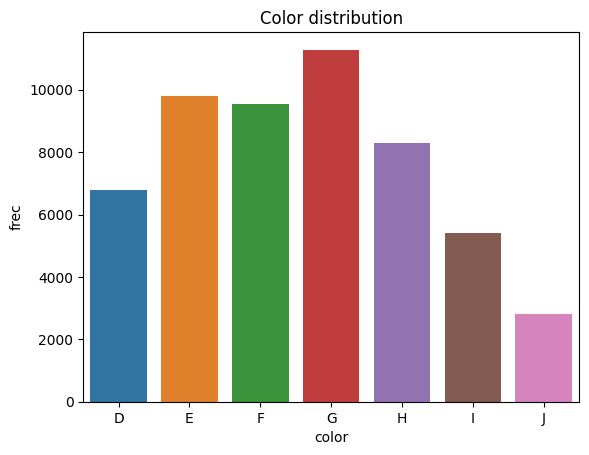

In [11]:
t = df.groupby('color', as_index=False)['cut']\
      .count()\
      .rename(columns={'cut': 'frec'})
popular_color = t.sort_values(by='frec', ascending=False).head(1)['color'].values[0]
print(f'The most popular color is {popular_color}')
sns.barplot(data=t, x='color', y='frec')
plt.title('Сolor distribution');

In [12]:
# price of a diamond changing depending on the color
t = df.groupby('color', as_index=False)['price'].agg(['mean', 'std', 'var']).reset_index(drop=False)
t

,index,color,mean,std,var
0,0,D,3168.106436,3353.391411,1.124523e+07
1,1,E,3076.752475,3344.158685,1.118340e+07
2,2,F,3725.080205,3785.694119,1.433148e+07
3,3,G,3996.876551,4049.165898,1.639574e+07
4,4,H,4480.942155,4208.831366,1.771426e+07
5,5,I,5089.973990,4720.748071,2.228546e+07
6,6,J,5323.818020,4438.187251,1.969751e+07


Text(0.5, 1.0, 'VAR')

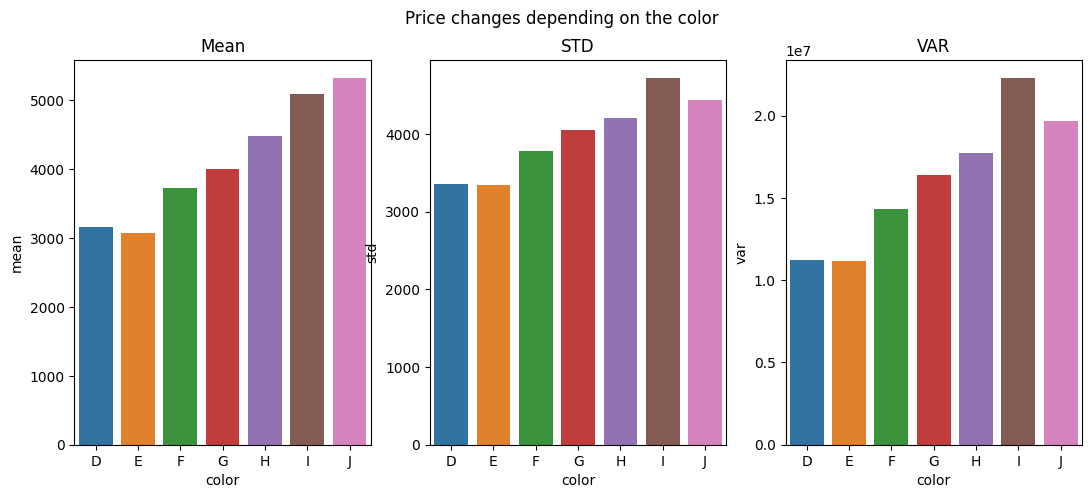

In [13]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(13,5))
sns.barplot(data=t, x='color', y='mean', ax=axes[0])
sns.barplot(data=t, x='color', y='std', ax=axes[1])
sns.barplot(data=t, x='color', y='var', ax=axes[2])
figure.suptitle('Price changes depending on the color')
axes[0].set_title('Mean')
axes[1].set_title('STD')
axes[2].set_title('VAR')

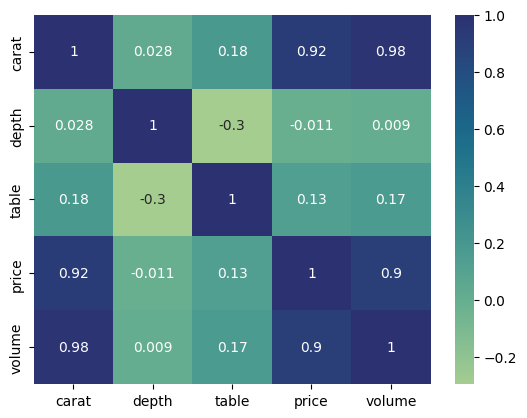

In [14]:
corr = df.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, cmap="crest", annot=True);

In [15]:
cm = sns.dark_palette("red", as_cmap=True)
df.groupby('cut')['price'].agg(['median', 'count']).style.background_gradient(cmap=cm, subset=['median'])
#Fair, Good, Very Good, Premium, Ideal

,median,count
cut,,
Fair,3282.000000,1609
Good,3050.500000,4902
Ideal,1809.500000,21548
Premium,3182.000000,13780
Very Good,2647.000000,12081


In [16]:
df.groupby('cut')['volume'].agg(['median', 'count']).style.background_gradient(cmap=cm, subset=['median'])

,median,count
cut,,
Fair,151.027200,1609
Good,131.906287,4902
Ideal,89.131752,21548
Premium,138.373504,13780
Very Good,117.167040,12081


In [22]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [19]:
df.describe()


,carat,depth,table,price,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,129.897567
std,0.473795,1.432331,2.234064,3987.280446,78.219789
min,0.200000,43.000000,43.000000,326.000000,31.707984
25%,0.400000,61.000000,56.000000,949.000000,65.189759
50%,0.700000,61.800000,57.000000,2401.000000,114.840180
75%,1.040000,62.500000,59.000000,5323.250000,170.846415
max,5.010000,79.000000,95.000000,18823.000000,3840.598060


In [21]:
df.describe(include=[object])

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns (cut, color, clarity)
label_encoder = LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])

# Selecting features and target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Regression model initialization and training
svm_regressor = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_regressor.fit(X_train, y_train)

# Predicting prices for the test set
y_pred = svm_regressor.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) score: {r2}")


Mean Squared Error: 2362855.5008923654
R-squared (R2) score: 0.8526158469072994


In [28]:
import pickle
#extracting the model file
with open(f"SVMRegression_DiamondsDataset","wb") as f:
    pickle.dump(svm_regressor,f)